In [1]:
from pykrx import stock

In [25]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [26]:
reset_seeds(42)

In [27]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
import numpy as np

In [29]:
DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"

In [30]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")

In [31]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220831 20230831


In [32]:
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [33]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [34]:
stocks = recommendation["Name"].to_list()
tmp = pd.DataFrame()
for n in stocks:
  tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-08-31,59700,95200,255000,632000,196000,80800,101000,22250,344000,85600,424000,82800,313500
2022-09-01,58400,92400,253000,623000,195500,80200,97700,21600,336000,81900,424500,78700,306500
2022-09-02,57500,91700,246000,610000,196500,80800,97300,21350,345500,81600,419000,78000,304000
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,67100,116500,577000,560000,186200,78100,98300,17000,254500,98900,429500,110300,314000
2023-08-28,66800,115900,593000,563000,185400,78300,99600,17150,257000,101200,436000,115800,325000
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500


In [62]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [63]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
tmp2

,Shape
POSCO홀딩스,836.399652
두산,265.613313
SK하이닉스,241.260396
키움증권,175.184536
삼성전자,136.518830


In [64]:
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정

### 주가수익률을 복리로 해야하는 이유
1. 주가수익률은 복리로 계산하는 것이 합리적이다.
> 예를들어 1000원투자 후 1년 뒤 수익금이 100원올라 1100원이 된 뒤 다시 1년뒤 10% 수익이 발생하면 1100*1.1 = 1210

In [65]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [39]:
port_ret = []
port_risk = []
port_weights = []
shape_ratio = []
rf = 0.0325

for i in range(30000):

    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)


    returns = np.dot(weights, annual_ret)


    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    shape_ratio.append(returns/risk)

portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
for j, s in enumerate(stocks):
    portfolio[s] = [weight[j] for weight in port_weights]

df = pd.DataFrame(portfolio)
max_shape = df.loc[df['Shape'] == df['Shape'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]
tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

In [40]:
best_ret = tmp2.loc[0,'Returns']
for i in range(tmp2.shape[0]):
  if tmp2.loc[i,'Returns']<best_ret:
    tmp2.drop(index=i,inplace=True)
  else:
    best_ret = tmp2.loc[i,'Returns']

In [41]:
max_shape

,Returns,Risk,Shape,POSCO홀딩스,두산,SK하이닉스,키움증권,삼성전자
5852,1.144557,0.325966,3.511277,0.680698,0.079007,0.187086,0.018866,0.034343


In [54]:
min_risk

,Returns,Risk,Shape,POSCO홀딩스,두산,SK하이닉스,키움증권,삼성전자
25133,0.41894,0.214888,1.949571,0.165718,0.06528,0.022275,0.102552,0.644174


### 로그수익률을 사용하는 이유
1. 복리효과를 고려할 수 있다.
2. 주식 가격의 장기적인 수익률을 더 정확하게 추정할 수 있다 > 정규분포
3. 로그수익률분포를 정규분포로 가정할 수 있음.
> 즉, 복리효과를 고려하여 주식 가격의 미래 가격을 조금 더 정확하게 예측할 수 있음.
> 로그 수익률의 분포를 이용하여 다양한 시나리오를 고려할 수 있음.

In [103]:
def monte_carlo_simulation(tmp,money):
    np.random.seed(42) # 시드고정
    num_simulations = 1000 # 반복횟수
    num_days_per_year = 90 # 단기 예측

    # 초기 가격 설정
    initial_price = money

    # 일일 수익률
    daily_returns = tmp.pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return =((1 + mean_return) ** num_days_per_year) - 1

    # 변동성 계산
    volatility = daily_returns.std() * np.sqrt(num_days_per_year)

    # 로그 수익률 시뮬레이션 생성
    log_returns = np.random.normal(
        (annual_return / num_days_per_year),
        (volatility / np.sqrt(num_days_per_year)),
        (num_days_per_year, num_simulations))

    # 로그 수익률을 이용해 주식 가격 시뮬레이션 생성
    price_simulations = initial_price * np.exp(np.cumsum(log_returns, axis=0))
    price_simulations_df = pd.DataFrame(price_simulations)


    return price_simulations_df

In [101]:
balance = 1000000
stock_money = max_shape[max_shape.columns[3:]]*balance
stock_money

,POSCO홀딩스,두산,SK하이닉스,키움증권,삼성전자
5852,680698.001782,79006.786025,187086.090692,18866.124061,34342.997441


In [122]:
balance_df = pd.DataFrame(np.zeros((90,1000)))
for i in range(len(stocks)):
    balance_df +=monte_carlo_simulation(tmp[stocks[i]],stock_money[stocks[i]].iloc[0])
balance_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.016982e+06,9.996774e+05,1.021142e+06,1.045602e+06,9.970904e+05,9.970909e+05,1.047193e+06,1.024453e+06,9.907706e+05,1.018244e+06,...,1.009087e+06,9.495830e+05,9.967396e+05,9.850986e+05,9.766298e+05,9.958263e+05,1.053400e+06,1.020953e+06,9.880519e+05,1.019070e+06
1,1.059827e+06,1.028487e+06,1.026291e+06,1.030986e+06,1.019563e+06,1.011199e+06,1.076546e+06,1.045772e+06,1.022766e+06,1.007052e+06,...,1.034692e+06,9.724322e+05,1.032817e+06,1.007570e+06,9.893173e+05,1.028562e+06,1.056252e+06,1.000316e+06,9.870727e+05,1.002175e+06
2,1.044211e+06,1.027985e+06,1.007979e+06,1.025938e+06,9.720199e+05,1.020530e+06,1.080274e+06,1.026421e+06,1.044732e+06,1.036445e+06,...,1.081725e+06,9.917600e+05,1.038377e+06,1.005237e+06,9.675008e+05,1.034251e+06,1.067292e+06,9.706230e+05,9.994345e+05,1.001394e+06
3,9.951126e+05,1.007790e+06,1.000187e+06,1.083402e+06,9.901216e+05,9.877208e+05,1.098343e+06,9.877489e+05,1.079485e+06,1.026831e+06,...,1.036939e+06,9.825640e+05,9.877508e+05,1.029373e+06,9.181758e+05,1.038595e+06,1.012422e+06,9.655547e+05,1.048428e+06,1.014668e+06
4,9.754943e+05,1.010391e+06,1.004103e+06,1.101126e+06,9.574986e+05,1.007104e+06,1.024336e+06,9.744076e+05,1.068969e+06,1.048155e+06,...,9.830885e+05,1.004301e+06,9.880638e+05,1.048861e+06,9.051201e+05,1.040778e+06,1.035625e+06,1.053920e+06,1.075284e+06,9.950711e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.577424e+06,1.587932e+06,1.720580e+06,1.954394e+06,1.544551e+06,1.136864e+06,1.369286e+06,1.327628e+06,1.723671e+06,2.165334e+06,...,1.318124e+06,1.466723e+06,1.300040e+06,1.190902e+06,1.181847e+06,1.459695e+06,1.335437e+06,1.467282e+06,1.660287e+06,1.190597e+06
86,1.517220e+06,1.593456e+06,1.711108e+06,1.863801e+06,1.531247e+06,1.070410e+06,1.352255e+06,1.350423e+06,1.687460e+06,2.131153e+06,...,1.339144e+06,1.500310e+06,1.304442e+06,1.220720e+06,1.162491e+06,1.475159e+06,1.382691e+06,1.482787e+06,1.661177e+06,1.224745e+06
87,1.589708e+06,1.625461e+06,1.644600e+06,1.831550e+06,1.580208e+06,1.060471e+06,1.360352e+06,1.336459e+06,1.734323e+06,2.170237e+06,...,1.329409e+06,1.577943e+06,1.281382e+06,1.163696e+06,1.254502e+06,1.517895e+06,1.379909e+06,1.496606e+06,1.672670e+06,1.176053e+06
88,1.594693e+06,1.650701e+06,1.667918e+06,1.721983e+06,1.594067e+06,1.077758e+06,1.363342e+06,1.297592e+06,1.804209e+06,2.176089e+06,...,1.307909e+06,1.568775e+06,1.275411e+06,1.149510e+06,1.269495e+06,1.598912e+06,1.405847e+06,1.536050e+06,1.635000e+06,1.192236e+06


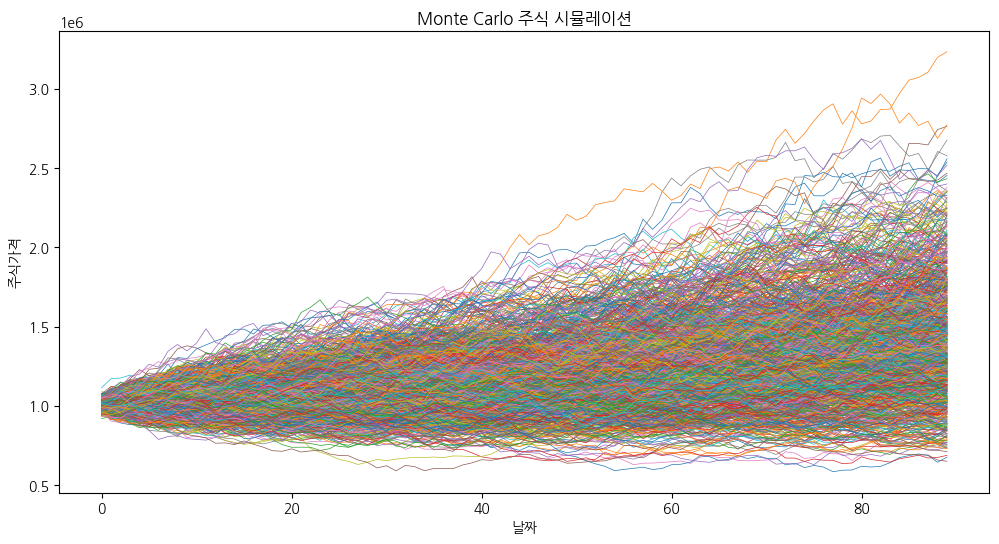

In [123]:
plt.figure(figsize=(12, 6))
for i in range(1000):
    plt.plot(balance_df.index, balance_df.iloc[:, i], lw=0.5)

plt.title('Monte Carlo 주식 시뮬레이션')
plt.xlabel('날짜')
plt.ylabel('주식가격')
plt.show()

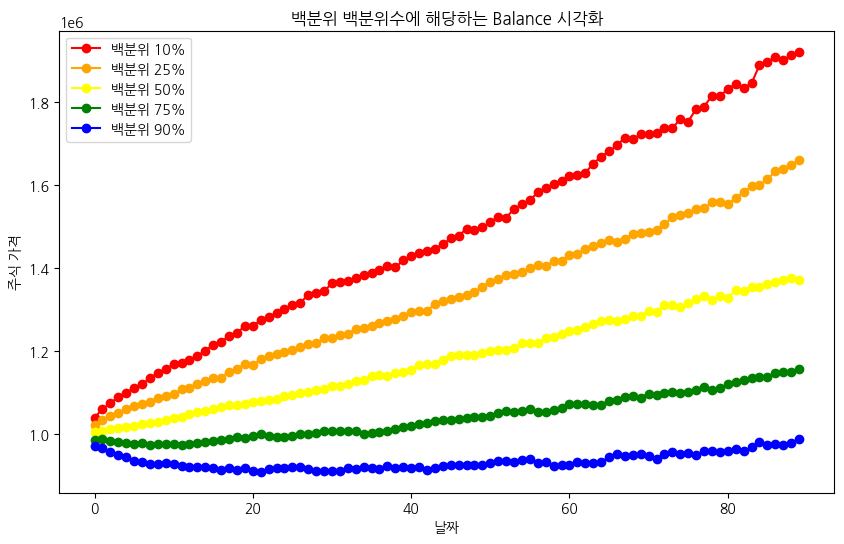

In [130]:
import matplotlib.pyplot as plt

# 데이터셋에서 백분위 n0%에 해당하는 열
top_10_percentile = balance_df.quantile(0.9, axis=1)
top_25_percentile = balance_df.quantile(0.75, axis=1)
top_50_percentile = balance_df.quantile(0.5, axis=1)
top_75_percentile = balance_df.quantile(0.25, axis=1)
top_90_percentile = balance_df.quantile(0.1, axis=1)

# 시각화
plt.figure(figsize=(10, 6))

plt.plot(top_10_percentile, color='red', label='백분위 10%', marker='o')
plt.plot(top_25_percentile, color='orange', label='백분위 25%', marker='o')
plt.plot(top_50_percentile, color='yellow', label='백분위 50%', marker='o')
plt.plot(top_75_percentile, color='green', label='백분위 75%', marker='o')
plt.plot(top_90_percentile, color='blue', label='백분위 90%', marker='o')

plt.title('백분위 백분위수에 해당하는 Balance 시각화')
plt.xlabel('날짜')
plt.ylabel('주식 가격')
plt.legend()
plt.show()

In [135]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}') 
pd.DataFrame([top_10_percentile.iloc[-1],top_25_percentile.iloc[-1],
 top_50_percentile.iloc[-1],top_75_percentile.iloc[-1],top_90_percentile.iloc[-1]],columns=['balance'],
 index=['10%','25%','50%',"75%","90%"])

,balance
10%,"1,922,280.80"
25%,"1,661,813.86"
50%,"1,371,304.56"
75%,"1,156,388.66"
90%,"988,020.82"
